In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
import os
pd.set_option('display.max_columns', 100)

In [2]:
PATH="Downloads/the-movies-dataset/"
print(os.listdir(PATH))

['links_small.csv', 'links.csv', 'credits.csv', 'movies_metadata.csv', 'ratings.csv', 'ratings_small.csv', 'keywords.csv']


In [3]:
ratings_df = pd.read_csv(os.path.join(PATH,"ratings_small.csv"), low_memory=False)

In [4]:
links_df = pd.read_csv(os.path.join(PATH,"links_small.csv"), low_memory=False)


In [5]:
movies_metadata_df = pd.read_csv(os.path.join(PATH,"movies_metadata.csv"), low_memory=False)


In [6]:
credits_df = pd.read_csv(os.path.join(PATH,"credits.csv"), low_memory=False)


In [7]:
keywords_df = pd.read_csv(os.path.join(PATH,"keywords.csv"), low_memory=False)


In [8]:
print("Ratings data contains {} rows and {} columns".format(ratings_df.shape[0], ratings_df.shape[1]))
print("Links data contains {} rows and {} columns".format(links_df.shape[0], links_df.shape[1]))
print("Movie metadata contains {} rows and {} columns".format(movies_metadata_df.shape[0], movies_metadata_df.shape[1]))
print("Credits data contains {} rows and {} columns".format(credits_df.shape[0], credits_df.shape[1]))
print("Keywords data contains {} rows and {} columns".format(keywords_df.shape[0], keywords_df.shape[1]))

Ratings data contains 100004 rows and 4 columns
Links data contains 9125 rows and 3 columns
Movie metadata contains 45466 rows and 24 columns
Credits data contains 45476 rows and 3 columns
Keywords data contains 46419 rows and 2 columns


In [9]:
ratings_df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
links_df.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
movies_metadata_df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
keywords_df.head()


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [13]:
from ast import literal_eval
# Returns the list top l elements or entire list; whichever is more.
def get_list(x, l=5):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than l elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > l:
            names = names[:l]
        return names

    #Return empty list in case of missing/malformed data
    return []

movies_metadata_df['genres'] = movies_metadata_df['genres'].apply(literal_eval)
movies_metadata_df['genres'] = movies_metadata_df['genres'].apply(get_list)

In [14]:
pd.DataFrame({'feature':ratings_df.dtypes.index, 'dtype':ratings_df.dtypes.values})


,feature,dtype
0,userId,int64
1,movieId,int64
2,rating,float64
3,timestamp,int64


In [15]:
movies_metadata_df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [16]:
pd.DataFrame({'feature':movies_metadata_df.dtypes.index, 'dtype':movies_metadata_df.dtypes.values})


,feature,dtype
0,adult,object
1,belongs_to_collection,object
2,budget,object
3,genres,object
4,homepage,object
5,id,object
6,imdb_id,object
7,original_language,object
8,original_title,object
9,overview,object


In [17]:
ratings_df.describe()


,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [18]:
import datetime
min_time = datetime.datetime.fromtimestamp(min(ratings_df.timestamp)).isoformat()
max_time = datetime.datetime.fromtimestamp(max(ratings_df.timestamp)).isoformat()
print('Timestamp for ratings from {} to {}:'.format(min_time, max_time))

Timestamp for ratings from 1995-01-09T19:46:49 to 2016-10-17T01:57:24:


In [19]:
def check_missing(data_df):
    total = data_df.isnull().sum().sort_values(ascending = False)
    percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

check_missing(ratings_df)

,timestamp,rating,movieId,userId
Total,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0


In [20]:
check_missing(movies_metadata_df)


,belongs_to_collection,homepage,tagline,overview,poster_path,runtime,status,release_date,imdb_id,original_language,vote_average,vote_count,revenue,spoken_languages,title,video,popularity,production_companies,production_countries,original_title,id,genres,budget,adult
Total,40972.000000,37684.000000,25054.000000,954.000000,386.000000,263.000000,87.000000,87.000000,17.000000,11.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0
Percent,90.115691,82.883913,55.104914,2.098271,0.848986,0.578454,0.191352,0.191352,0.037391,0.024194,0.013197,0.013197,0.013197,0.013197,0.013197,0.013197,0.010997,0.006598,0.006598,0.0,0.0,0.0,0.0,0.0


In [21]:
movies_metadata_df.dropna(subset=['title'], inplace=True)
check_missing(movies_metadata_df)

,belongs_to_collection,homepage,tagline,overview,poster_path,runtime,release_date,status,imdb_id,original_language,budget,genres,id,original_title,vote_count,popularity,vote_average,production_companies,production_countries,revenue,spoken_languages,title,video,adult
Total,40970.000000,37682.000000,25048.000000,954.000000,383.000000,257.000000,84.000000,81.000000,17.000000,11.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,90.123185,82.890453,55.098988,2.098548,0.842499,0.565332,0.184778,0.178179,0.037396,0.024197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
movies_metadata_df['id'] = pd.to_numeric(movies_metadata_df['id'])


In [23]:
ratings_df.shape
ratings_df = ratings_df.merge(movies_metadata_df[['id']], left_on=['movieId'], right_on=['id'], how='inner')

In [24]:
ratings_df.shape

(44994, 5)

In [25]:
ratings_df['time_dt'] = ratings_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [26]:
ratings_df.head()

,userId,movieId,rating,timestamp,id,time_dt
0,1,1371,2.5,1260759135,1371,2009-12-14 10:52:15
1,4,1371,4.0,949810302,1371,2000-02-06 12:11:42
2,7,1371,3.0,851869160,1371,1996-12-29 22:19:20
3,19,1371,4.0,855193404,1371,1997-02-06 09:43:24
4,21,1371,3.0,853852263,1371,1997-01-21 21:11:03


In [27]:
ratings_df['year'] = ratings_df['time_dt'].dt.year
ratings_df['month'] = ratings_df['time_dt'].dt.month
ratings_df['day'] = ratings_df['time_dt'].dt.day
ratings_df['dayofweek'] = ratings_df['time_dt'].dt.dayofweek

In [28]:
ratings_df[['year', 'month', 'day', 'dayofweek']].describe()


,year,month,day,dayofweek
count,44994.000000,44994.000000,44994.000000,44994.000000
mean,2004.003000,6.806463,15.566987,2.889319
std,5.986636,3.514987,8.766789,2.007038
min,1995.000000,1.000000,1.000000,0.000000
25%,2000.000000,4.000000,8.000000,1.000000
50%,2003.000000,7.000000,16.000000,3.000000
75%,2008.000000,10.000000,23.000000,5.000000
max,2016.000000,12.000000,31.000000,6.000000


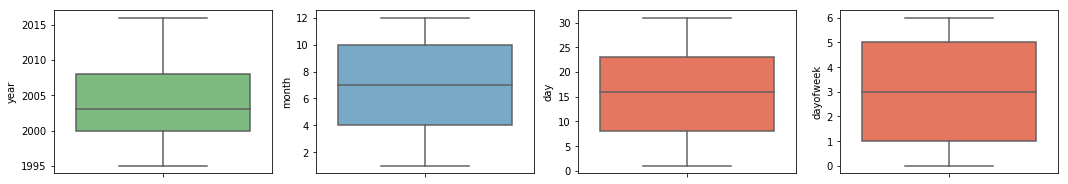

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18,3))
s = sns.boxplot(ax = ax1, y="year", data=ratings_df, palette="Greens",showfliers=True)
s = sns.boxplot(ax = ax2, y="month", data=ratings_df, palette="Blues",showfliers=True)
s = sns.boxplot(ax = ax3, y="day", data=ratings_df, palette="Reds",showfliers=True)
s = sns.boxplot(ax = ax4, y="dayofweek", data=ratings_df, palette="Reds",showfliers=True)
plt.show()

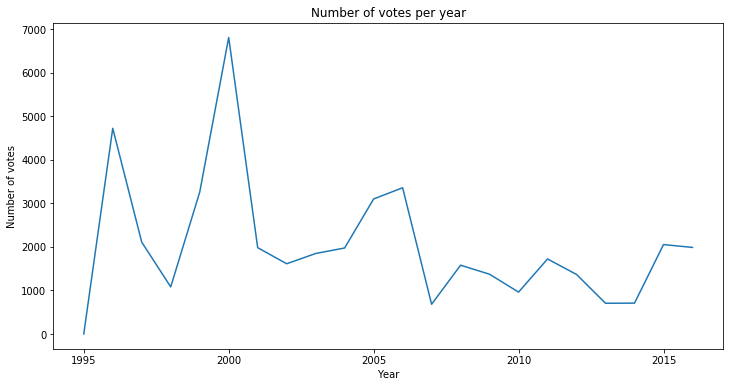

In [30]:
dt = ratings_df.groupby(['year'])['rating'].count().reset_index()
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['year'],dt['rating']); plt.xlabel('Year'); plt.ylabel('Number of votes'); plt.title('Number of votes per year')
plt.show()

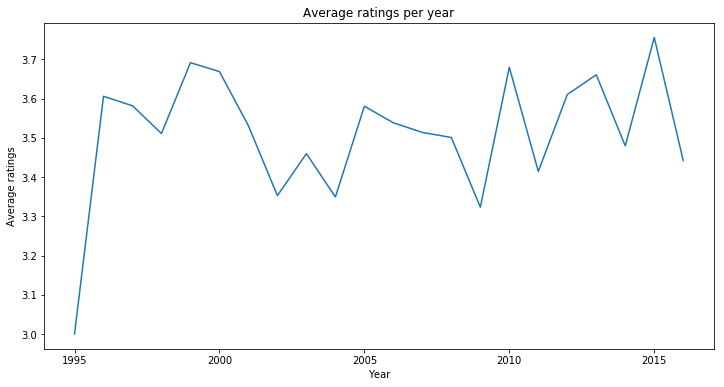

In [31]:
dt = ratings_df.groupby(['year'])['rating'].mean().reset_index()
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['year'],dt['rating']); plt.xlabel('Year'); plt.ylabel('Average ratings'); plt.title('Average ratings per year')
plt.show()

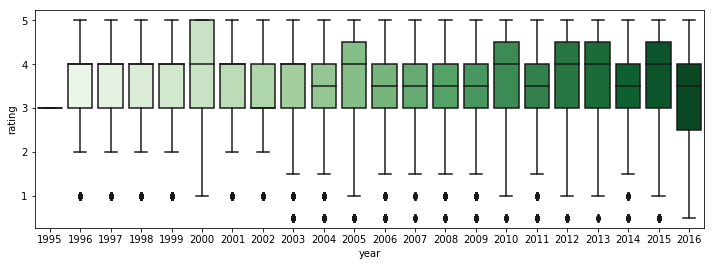

In [32]:
fig, (ax) = plt.subplots(ncols=1, figsize=(12,4))
s = sns.boxplot(x='year', y="rating", data=ratings_df, palette="Greens",showfliers=True)
plt.show()

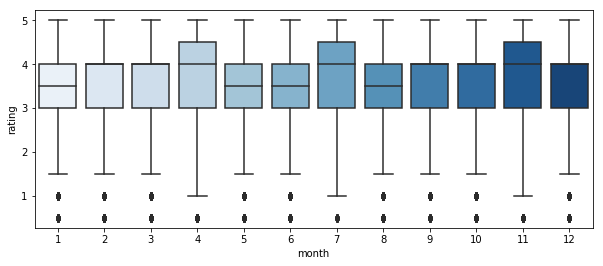

In [33]:
fig, (ax) = plt.subplots(ncols=1, figsize=(10,4))
s = sns.boxplot(x='month', y="rating", data=ratings_df, palette="Blues",showfliers=True)
plt.show()

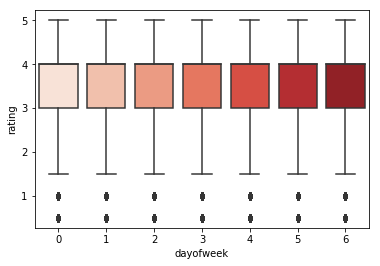

In [34]:
fig, (ax) = plt.subplots(ncols=1, figsize=(6,4))
s = sns.boxplot(x='dayofweek', y="rating", data=ratings_df, palette="Reds",showfliers=True)
plt.show()

In [35]:
print("There is a total of {} users, with an average number of {} votes.".format(ratings_df.userId.nunique(), \
                                                round(ratings_df.shape[0]/ratings_df.userId.nunique()),2))

There is a total of 671 users, with an average number of 67 votes.


In [36]:
print("Top 5 voting users:\n")
tmp = ratings_df.userId.value_counts()[:5]
pd.DataFrame({'Votes':tmp.values, 'Id':tmp.index})

Top 5 voting users:



,Votes,Id
0,896,564
1,753,547
2,565,15
3,553,73
4,542,452


In [37]:
tmp = ratings_df.userId.value_counts()
df = pd.DataFrame({'Votes':tmp.values, 'Id':tmp.index})
print("There are {} users that voted only once.".format(df[df['Votes']==1].nunique().values[0]))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [38]:
tmp = ratings_df.groupby(['userId'])['rating'].mean().reset_index()
tmp['rating'] = tmp['rating'].apply(lambda x: round(x,3))
df_max = tmp[tmp['rating']==5]
df_min = tmp[tmp['rating']==0.5]
print("Users giving only '5': {}\nUsers giving only '0.5':{}".format(df_max.shape[0], df_min.shape[0]))

Users giving only '5': 1
Users giving only '0.5':0


In [39]:
mean_rating = round(ratings_df['rating'].mean(),3)
print("Average value of rating is {}.".format(mean_rating))
print("There are {} users that have their average score with the overall average score (approx. with 3 decimals).".format(\
                            tmp[tmp['rating']==mean_rating]['userId'].nunique()))

Average value of rating is 3.561.
There are 1 users that have their average score with the overall average score (approx. with 3 decimals).


In [40]:
print("There is a total of {} movies, with an average number of {} votes.".format(ratings_df.movieId.nunique(), \
                                                round(ratings_df.shape[0]/ratings_df.movieId.nunique()),2))

There is a total of 2830 movies, with an average number of 16 votes.


In [41]:
print("Top 10 voted movies:\n")
tmp = ratings_df.movieId.value_counts()[:10]
pd.DataFrame({'Votes':tmp.values, 'id':tmp.index})

Top 10 voted movies:



,Votes,id
0,324,296
1,311,318
2,304,593
3,291,260
4,274,480
5,244,527
6,228,110
7,224,608
8,218,780
9,215,588


In [42]:
top_10 = pd.DataFrame({'Votes':tmp.values, 'id':tmp.index}).merge(movies_metadata_df)
top_10

,Votes,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,324,296,False,"{'id': 528, 'name': 'The Terminator Collection...",200000000,"[Action, Thriller, Science Fiction]",NaN,tt0181852,en,Terminator 3: Rise of the Machines,It's been 10 years since John Connor saved Ear...,20.818907,/lz4xYdF1n09lyiCfZWtWT44SZiG.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2003-07-02,435000000.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,False,5.9,2177.0
1,311,318,False,NaN,8000000,"[Drama, Thriller]",NaN,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,4.938231,/4wxOzpCjXY2RQgS3YoHuvKdItTF.jpg,"[{'name': 'Kintop Pictures', 'id': 1490}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Million Dollar Hotel,False,5.9,76.0
2,304,593,False,NaN,0,"[Drama, Science Fiction, Adventure, Mystery]",NaN,tt0069293,ru,Солярис,Ground control has been receiving strange tran...,11.059785,/nsGLKlwEOtqatz8yRdxOlAw5utr.jpg,"[{'name': 'Mosfilm', 'id': 5120}, {'name': 'Cr...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1972-03-20,0.0,167.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Solaris,False,7.7,364.0
3,291,260,False,NaN,0,"[Action, Thriller, Mystery]",NaN,tt0026029,en,The 39 Steps,"While on vacation in London, Canadian Richard ...",5.865697,/9v283GWj9a0AC8wwC4zriNqY1lZ.jpg,[{'name': 'Gaumont British Picture Corporation...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1935-06-01,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Handcuffed to the girl who double-crossed him,The 39 Steps,False,7.4,217.0
4,274,480,False,NaN,0,"[Comedy, Drama, Romance]",NaN,tt0265343,hi,Monsoon Wedding,From an exciting Indian wedding comes a relati...,10.625504,/2LysDwqhK0GlGtQqjPCiDeiBoqU.jpg,"[{'name': 'IFC Films', 'id': 307}, {'name': 'M...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2001-08-30,0.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A stressed father, a bride-to-be with a secret...",Monsoon Wedding,False,6.8,59.0
5,244,527,False,"{'id': 300546, 'name': 'Once were Warriors Col...",0,[Drama],NaN,tt0110729,en,Once Were Warriors,A drama about a Maori family lving in Auckland...,4.025276,/8QF48QS5lvtrhOclt22RFz3bSQm.jpg,"[{'name': 'Avalon Studios', 'id': 293}, {'name...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}]",1994-09-02,2201126.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A family in crisis, a life in chaos... Nothing...",Once Were Warriors,False,7.6,106.0
6,228,110,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[Drama, Mystery, Romance]",NaN,tt0111495,fr,Trois couleurs : Rouge,Red This is the third film from the trilogy by...,7.832755,/77CFEssoKesi4zvtADEpIrSKhA3.jpg,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
7,224,608,False,"{'id': 86055, 'name': 'Men In Black Collection...",140000000,"[Action, Adventure, Comedy, Science Fiction]",http://www.sonypictures.com/homevideo/meninbla...,tt0120912,en,Men in Black II,"Kay and Jay reunite to provide our best, last ...",16.775716,/qWjRfBwr4VculczswwojXgoU0mq.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-07-03,441818803.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Same Planet. New Scum.,Men in Black II,False,6.1,3188.0
8,218,780,False,NaN,0,"[Drama, History]",NaN,tt0019254,fr,La passion de Jeanne d'Arc,"A classic of the si

In [43]:
tmp = ratings_df.movieId.value_counts()
df = pd.DataFrame({'Votes':tmp.values, 'Id':tmp.index})
print("There are {} movies that were voted only once.".format(df[df['Votes']==1].nunique().values[0]))

There are 1 movies that were voted only once.


In [44]:
tmp = ratings_df.groupby(['movieId'])['rating'].mean().reset_index()
tmp['rating'] = tmp['rating'].apply(lambda x: round(x,3))
df_max = tmp[tmp['rating']==5]
df_min = tmp[tmp['rating']==0.5]
print("Movies with only '5': {}\nMovies with only '0.5':{}".format(df_max.shape[0], df_min.shape[0]))

Movies with only '5': 86
Movies with only '0.5':26


In [45]:
mean_rating = round(ratings_df['rating'].mean(),3)
print("Average value of rating is {}.".format(mean_rating))
print("There are {} movies that have their average score with the overall average score (approx. with 3 decimals).".format(\
                            tmp[tmp['rating']==mean_rating]['movieId'].nunique()))

Average value of rating is 3.561.
There are 1 movies that have their average score with the overall average score (approx. with 3 decimals).


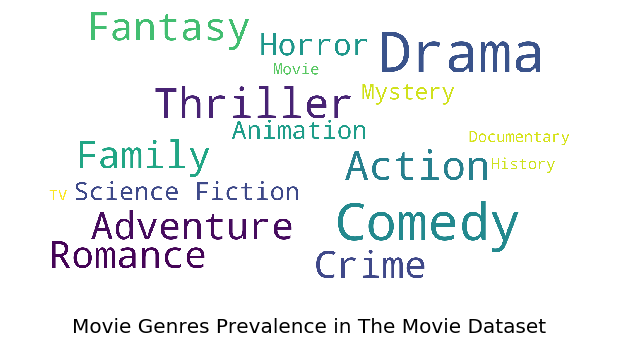

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=17,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(movies_metadata_df['genres'], title = 'Movie Genres Prevalence in The Movie Dataset')

In [47]:
tmp = ratings_df.groupby(['movieId'])['rating'].mean()
R = pd.DataFrame({'id':tmp.index, 'R': tmp.values})
tmp = ratings_df.groupby(['movieId'])['rating'].count()
v = pd.DataFrame({'id':tmp.index, 'v': tmp.values})
C = ratings_df['rating'].mean()

In [48]:
m_df = movies_metadata_df.merge(R, on=['id'])
m_df = m_df.merge(v, on=['id'])
m_df['C'] = C
m= m_df['v'].quantile(0.9)
m_df['m'] = m

In [49]:
m_df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,R,v,C,m
0,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.560986,44.0
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,3.560986,44.0
2,False,NaN,98000000,"[Action, Adventure]",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,3.560986,44.0
3,False,NaN,52000000,"[Drama, Crime]",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.560986,44.0
4,False,NaN,16500000,"[Drama, Romance]",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,3.560986,44.0


In [50]:
m_df['IMDB'] = (m_df['v'] / (m_df['v'] + m_df['m'])) * m_df['R'] + (m_df['m'] / (m_df['v'] + m_df['m'])) * m_df['C']

In [51]:
m_df.sort_values(by=['IMDB'], ascending=False).head(10)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,R,v,C,m,IMDB
747,False,NaN,8000000,"[Drama, Thriller]",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,4.938231,/4wxOzpCjXY2RQgS3YoHuvKdItTF.jpg,"[{'name': 'Kintop Pictures', 'id': 1490}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Million Dollar Hotel,False,5.9,76.0,4.487138,311,3.560986,44.0,4.372348
102,False,NaN,21000000,"[Comedy, Drama, Romance]",NaN,858,tt0108160,en,Sleepless in Seattle,A young boy who tries to set his dad up on a d...,10.234919,/afkYP15OeUOD0tFEmj6VvejuOcz.jpg,"[{'name': 'TriStar Pictures', 'id': 559}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-06-24,227799884.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"What if someone you never met, someone you nev...",Sleepless in Seattle,False,6.5,630.0,4.487500,200,3.560986,44.0,4.320424
48,False,"{'id': 300546, 'name': 'Once were Warriors Col...",0,[Drama],NaN,527,tt0110729,en,Once Were Warriors,A drama about a Maori family lving in Auckland...,4.025276,/8QF48QS5lvtrhOclt22RFz3bSQm.jpg,"[{'name': 'Avalon Studios', 'id': 293}, {'name...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}]",1994-09-02,2201126.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"A family in crisis, a life in chaos... Nothing...",Once Were Warriors,False,7.6,106.0,4.303279,244,3.560986,44.0,4.189873
1042,False,"{'id': 528, 'name': 'The Terminator Collection...",200000000,"[Action, Thriller, Science Fiction]",NaN,296,tt0181852,en,Terminator 3: Rise of the Machines,It's been 10 years since John Connor saved Ear...,20.818907,/lz4xYdF1n09lyiCfZWtWT44SZiG.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2003-07-02,435000000.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,False,5.9,2177.0,4.256173,324,3.560986,44.0,4.173053
929,False,"{'id': 86055, 'name': 'Men In Black Collection...",140000000,"[Action, Adventure, Comedy, Science Fiction]",http://www.sonypictures.com/homevideo/meninbla...,608,tt0120912,en,Men in Black II,"Kay and Jay reunite to provide our best, last ...",16.775716,/qWjRfBwr4VculczswwojXgoU0mq.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-07-03,441818803.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Same Planet. New Scum.,Men in Black II,False,6.1,3188.0,4.256696,224,3.560986,44.0,4.142475
174,False,NaN,0,"[Action, Thriller, Mystery]",NaN,260,tt0026029,en,The 39 Steps,"While on vacation in London, Canadian Richard ...",5.865697,/9v283GWj9a0AC8wwC4zriNqY1lZ.jpg,[{'name': 'Gaumont British Picture Corporation...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1935-06-01,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Handcuffed to the girl who double-crossed him,The 39 Steps,False,7.4,217.0,4.221649,291,3.560986,44.0,4.134876
925,False,NaN,0,"[Action, Western, Thriller]",NaN,4993,tt0062626,en,5 Card Stud,The players in an ongoing poker game are being...,1.372254,/gev2WX8alGl0f7Ql0JZfeOY8uDg.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1968-07-28,0.0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A card cheat was hung... then all hell broke l...,5 Card Stud,False,6.0,20.0,4.182500,200,3.560986,44.0,4.070424
1804,False,NaN,35000000,[Comedy],http://licensetowedthemovie.warnerbros.com/,2959,tt0762114,en,License to Wed,"Newly engaged, Ben and Sadie can't wait to sta...",7.102076,/9I8NiY5cfFmwgI8Y5NKQqsuDawS.jpg,"[{'name': 'Village Roadshow Picture

In [52]:
m_df[['title', 'IMDB']].sort_values(by=['IMDB'], ascending=False).head(10)


,title,IMDB
747,The Million Dollar Hotel,4.372348
102,Sleepless in Seattle,4.320424
48,Once Were Warriors,4.189873
1042,Terminator 3: Rise of the Machines,4.173053
929,Men in Black II,4.142475
174,The 39 Steps,4.134876
925,5 Card Stud,4.070424
1804,License to Wed,4.067819
650,Solaris,4.065182
2400,Shriek If You Know What I Did Last Friday the ...,4.060701


In [53]:
m_df['R_x_v'] = m_df['R'] * m_df['v']


In [54]:
m_df[['title', 'v']].sort_values(by=['v'], ascending=False).head(10)


,title,v
1042,Terminator 3: Rise of the Machines,324
747,The Million Dollar Hotel,311
650,Solaris,304
174,The 39 Steps,291
885,Monsoon Wedding,274
48,Once Were Warriors,244
53,Three Colors: Red,228
929,Men in Black II,224
1109,The Passion of Joan of Arc,218
1646,Silent Hill,215


In [55]:
m_df[['title', 'R_x_v']].sort_values(by=['R_x_v'], ascending=False).head(10)


,title,R_x_v
747,The Million Dollar Hotel,1395.5
1042,Terminator 3: Rise of the Machines,1379.0
650,Solaris,1258.0
174,The 39 Steps,1228.5
48,Once Were Warriors,1050.0
885,Monsoon Wedding,1015.5
929,Men in Black II,953.5
53,Three Colors: Red,899.5
102,Sleepless in Seattle,897.5
1804,License to Wed,844.0


In [56]:
del tmp, top_10
gc.collect()

8834

RECOMMENDATIONS BASED ON MOVIE TITLE:

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',max_features=10000)
tokens = m_df[['title']]
tokens['title'] = tokens['title'].fillna('')
tfidf_matrix = tfidf.fit_transform(tokens['title'])
print(tfidf_matrix.shape)
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
indices = pd.Series(tokens.index, index=tokens['title']).drop_duplicates()
def get_recommendations(title, cosine_sim=cosine_sim):
    # index of the movie that matches the title
    idx = indices[title]

    # similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # movie indices
    movie_indices = [i[0] for i in sim_scores]

    # top 10 most similar movies
    return tokens['title'].iloc[movie_indices]

(2831, 3222)
(2831, 2831)


/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
get_recommendations('The Million Dollar Hotel')


1458       Million Dollar Baby
1191    One Million Years B.C.
2407        Hotel Very Welcome
1242    How to Steal a Million
1459              Hotel Rwanda
2331          Heartbreak Hotel
1536      Billion Dollar Brain
0                         Heat
1                    GoldenEye
2             Cutthroat Island
Name: title, dtype: object

RECOMMENDATIONS BASED ON SIMILARITY AND POPULARITY:

In [59]:
tfidf = TfidfVectorizer(stop_words='english',max_features=10000)
tokens = m_df[['title']]
tokens['title'] = tokens['title'].fillna('')
tfidf_matrix = tfidf.fit_transform(tokens['title'])
print(tfidf_matrix.shape)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)
indices = pd.Series(tokens.index, index=tokens['title']).drop_duplicates()

(2831, 3222)
(2831, 2831)


/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
def get_imdb_score(df, indices):
    # select the data from similarity indices
    tmp = df[df.id.isin(indices)]
    # sort the data by IMDB score
    tmp = tmp.sort_values(by='IMDB', ascending=False)
    # return title and IMDB score
    return tmp[['title','IMDB']].head(10)

In [61]:
def get_10_recommendations_simpol(title, cosine_sim=cosine_sim):
    # index of the movie that matches the title
    idx = indices[title]

    # similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # scores of the 20 most similar movies
    sim_scores = sim_scores[1:21]
    
    # movie indices
    movie_indices = [i[0] for i in sim_scores]

    # get popularity scores
    pop_scores = get_imdb_score(m_df, movie_indices)
    
    return list(pop_scores['title'])

In [62]:
get_10_recommendations_simpol('The Million Dollar Hotel')


['Judgment Night',
 'Star Wars',
 'Jesus',
 'Ariel',
 'Four Rooms',
 'Finding Nemo',
 'Shadows in Paradise']

In [63]:
get_10_recommendations_simpol('Judgment Night')


['Cat on a Hot Tin Roof',
 'Marlowe',
 'Three Colors: Blue',
 'The Secret Life of Words',
 'Harry Potter and the Half-Blood Prince',
 'Lady Snowblood',
 'Hellboy',
 'Sleepy Hollow',
 'The Aviator',
 'Short Circuit']

In [64]:
m_df.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,R,v,C,m,IMDB,R_x_v
0,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.560986,44.0,3.569723,57.5
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,3.560986,44.0,3.471378,3.0
2,False,NaN,98000000,"[Action, Adventure]",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,3.560986,44.0,3.588315,155.5
3,False,NaN,52000000,"[Drama, Crime]",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.560986,44.0,3.558542,128.0
4,False,NaN,16500000,"[Drama, Romance]",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,3.560986,44.0,3.592964,5.0
5,False,NaN,4000000,"[Crime, Comedy]",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0,3.267857,56,3.560986,44.0,3.396834,183.0
6,False,"{'id': 91698, 'name': 'Chili Palmer Collection...",30250000,"[Comedy, Thriller, Crime]",NaN,8012,tt0113161,en,Get Shorty,Chili Palmer is a Miami mobster who gets sent ...,12.669608,/vWtDUUgQAsVyvRW4mE75LBgVm2e.jpg,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,False,6.4,305.0,4.375000,4,3.560986,44.0,3.628820,17.5
7,False,NaN,3600000,"[Drama, Romance]",http://www.mgm.com/title_title.do?title_star=L...,451,tt0113627,en,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",10.332025,/37qHRJxnSh5YkuaN9FgfNnMl3Tj.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'US'

In [65]:
m_df['genres1'] = m_df.genres.apply(', '.join)

In [66]:
m_df.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,R,v,C,m,IMDB,R_x_v,genres1
0,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,16,3.560986,44.0,3.569723,57.5,"Action, Crime, Drama, Thriller"
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,2,3.560986,44.0,3.471378,3.0,"Adventure, Action, Thriller"
2,False,NaN,98000000,"[Action, Adventure]",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,/odM9973kIv9hcjfHPp6g6BlyTIJ.jpg,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,43,3.560986,44.0,3.588315,155.5,"Action, Adventure"
3,False,NaN,52000000,"[Drama, Crime]",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,/xo517ibXBDdYQY81j0WIG7BVcWq.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,36,3.560986,44.0,3.558542,128.0,"Drama, Crime"
4,False,NaN,16500000,"[Drama, Romance]",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",10.673167,/lA9HTy84Bb6ZwNeyoZKobcMdpMc.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,1,3.560986,44.0,3.592964,5.0,"Drama, Romance"
5,False,NaN,4000000,"[Crime, Comedy]",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4300000.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0,3.267857,56,3.560986,44.0,3.396834,183.0,"Crime, Comedy"
6,False,"{'id': 91698, 'name': 'Chili Palmer Collection...",30250000,"[Comedy, Thriller, Crime]",NaN,8012,tt0113161,en,Get Shorty,Chili Palmer is a Miami mobster who gets sent ...,12.669608,/vWtDUUgQAsVyvRW4mE75LBgVm2e.jpg,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,False,6.4,305.0,4.375000,4,3.560986,44.0,3.628820,17.5,"Comedy, Thriller, Crime"
7,False,NaN,3600000,"[Drama, Romance]",http://www.mgm.com/title_title.do?title_star=L...,451,tt0113627,en,Leaving Las Vegas,"Be

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(m_df['genres1'])

In [69]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [70]:
# Build a 1-dimensional array with movie titles
titles = m_df['title']
indices = pd.Series(m_df.index, index=m_df['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [73]:
m_df['title'].unique

<bound method Series.unique of 0                                                  Heat
1                                             GoldenEye
2                                      Cutthroat Island
3                                                Casino
4                                 Sense and Sensibility
5                                            Four Rooms
6                                            Get Shorty
7                                     Leaving Las Vegas
8                             The City of Lost Children
9                                        Twelve Monkeys
10                                     Dead Man Walking
11                                           To Die For
12                                   Mr. Holland's Opus
13                                         French Twist
14                                  From Dusk Till Dawn
15                                       Antonia's Line
16                                   Angels and Insects
17               

In [78]:
genre_recommendations('Finding Nemo').head(20)


2274       'Twas the Night Before Christmas
2426    Space Chimps 2: Zartog Strikes Back
2451                 The Butter Battle Book
2499             Casper's Haunted Christmas
2124                 The Return of the King
1697                            Open Season
113         Snow White and the Seven Dwarfs
988                      My Neighbor Totoro
263                                Fantasia
2113                              The House
2164                                 Cars 2
1321                      The Polar Express
2237    Arthur and the Revenge of Maltazard
947                           Spirited Away
1627                  Ice Age: The Meltdown
2054                  Dante's Hell Animated
2394                               Nocturna
2448                      The Periwig-Maker
2816                The Wearing of the Grin
2825                          Wolf and Calf
Name: title, dtype: object

In [80]:
genre_recommendations('Men in Black II').head(5)


1479                       Double Dragon
809     Bill & Ted's Excellent Adventure
520                       Wild Wild West
212                               Brazil
260                   Young Frankenstein
Name: title, dtype: object

In [81]:
genre_recommendations('Cars 2').head(5)


2644                     War of the Buttons
1026                           Finding Nemo
2274       'Twas the Night Before Christmas
2426    Space Chimps 2: Zartog Strikes Back
2451                 The Butter Battle Book
Name: title, dtype: object